In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df.isna().sum()/len(df)*100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [5]:
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [6]:
df.isna().sum()/len(df)*100

id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

In [16]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [18]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [19]:
df['Inflight wifi service'].unique()

array([5, 1, 2, 0, 3, 4])

In [20]:
df['Ease of Online booking'].unique()

array([3, 2, 0, 4, 5, 1])

In [22]:
df['Food and drink'].unique()

array([3, 5, 2, 4, 1, 0])

In [23]:
df['Customer Type'].value_counts().get('Loyal Customer', 0)/len(df)*100

np.float64(81.53168810103116)

In [24]:
df['Gender'].value_counts().get('Female', 0)/len(df)*100

np.float64(50.69709960220909)

In [27]:
df['Type of Travel'].value_counts()/len(df)*100

Type of Travel
Business travel    69.439617
Personal Travel    30.560383
Name: count, dtype: float64

In [28]:
df['Class'].value_counts()/len(df)*100

Class
Business    48.109528
Eco         44.506237
Eco Plus     7.384235
Name: count, dtype: float64

In [7]:
df['satisfaction'].value_counts()/len(df)*100

satisfaction
neutral or dissatisfied    56.107828
satisfied                  43.892172
Name: count, dtype: float64

In [9]:
df['Age'].loc[df['Age'].idxmax()]

np.int64(85)

In [10]:
df['Flight Distance'].loc[df['Flight Distance'].idxmax()]

np.int64(4983)

In [14]:
df[df['Gender'] == 'Female'].groupby('Type of Travel').agg({'id': 'count'})/len(df['Gender'])*100

,id
Type of Travel,
Business travel,35.638976
Personal Travel,15.058124


In [16]:
df[df['Gender'] == 'Female'].groupby('Class').agg({'id': 'count'})/len(df['Gender'])*100

,id
Class,
Business,24.373383
Eco,22.380566
Eco Plus,3.943151


In [19]:
df['Departure Delay in Minutes'].loc[df['Departure Delay in Minutes'].idxmax()]

np.int64(1128)

In [25]:
df['Departure Delay in Minutes'].unique()

array([  50,    0,   77,    1,   28,   29,   18,  117,   10,    5,    2,
          8,   21,    3,   40,   80,   73,    4,  116,   59,   92,   20,
         17,   30,   66,    9,    6,   14,   49,   44,   24,    7,   83,
         13,   62,   16,   27,   94,   93,  180,   86,   82,   32,  100,
         25,   34,   90,   23,  168,   96,   45,   35,   85,   11,   26,
        102,   12,   33,   19,   15,   57,   51,  243,  152,   38,   42,
         47,   60,   91,   52,  238,  150,   37,   71,   89,  108,  141,
        132,   87,   81,   70,  140,   43,   41,  214,   63,  109,  145,
         97,   56,   48,  114,  277,   22,  129,  493,   72,  332,   36,
        125,   55,  136,   31,   64,  416,   46,   58,   39,  105,   68,
        113,  124,  137,  187,   53,   79,  247,   75,   98,   88,   69,
        146,   74,  118,   54,  130,  222,  163,  205,  275,  167,  142,
        204,   99,   67,  170,  104,  258,   61,  155,  202,  951,  190,
        266,   65,  106,  126,  107,  120,  290,  1

In [26]:
median_delay = df['Departure Delay in Minutes'].median()
mean_delay = df['Departure Delay in Minutes'].mean()
std_delay = df['Departure Delay in Minutes'].std()
print(f"Median: {median_delay}")
print(f"Mean: {mean_delay}")
print(f"Standard Deviation: {std_delay}")

Median: 0.0
Mean: 14.225080137488897
Standard Deviation: 37.18591949956625


In [27]:
Q1 = df['Departure Delay in Minutes'].quantile(0.25)
Q3 = df['Departure Delay in Minutes'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR Range: {IQR}")

IQR Range: 12.0


In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [29]:
outliers = df[df['Departure Delay in Minutes'] > upper_bound]
num_outliers = outliers.shape[0] 
outlier_percentage = (num_outliers / len(df)) * 100
print(f"Upper Bound (Outlier Threshold): {upper_bound}")
print(f"Number of Outliers: {num_outliers}")
print(f"Percentage of Outliers: {outlier_percentage:.2f}%")

Upper Bound (Outlier Threshold): 30.0
Number of Outliers: 3542
Percentage of Outliers: 13.68%


In [31]:
df.loc[df['Departure Delay in Minutes'] > upper_bound, 'Departure Delay in Minutes'] = median_delay

In [32]:
outliers = df[df['Departure Delay in Minutes'] > upper_bound]
num_outliers = outliers.shape[0] 
outlier_percentage = (num_outliers / len(df)) * 100
print(f"Upper Bound (Outlier Threshold): {upper_bound}")
print(f"Number of Outliers: {num_outliers}")
print(f"Percentage of Outliers: {outlier_percentage:.2f}%")

Upper Bound (Outlier Threshold): 30.0
Number of Outliers: 0
Percentage of Outliers: 0.00%


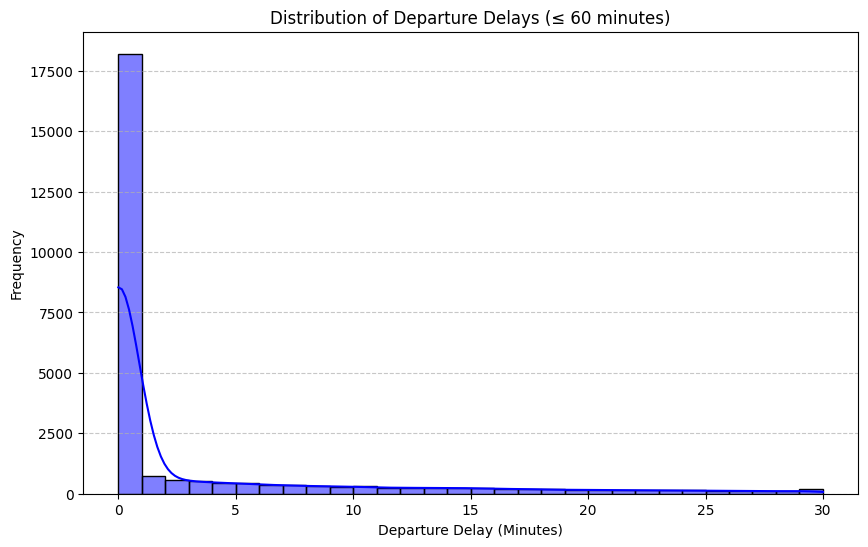

In [33]:
filtered_delays = df[df['Departure Delay in Minutes'] <= 60]['Departure Delay in Minutes']
plt.figure(figsize=(10,6))
sns.histplot(filtered_delays, bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Departure Delays (≤ 60 minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:
df['Departure Delay in Minutes'].value_counts().head(10)

Departure Delay in Minutes
0     18199
1       732
2       579
3       524
4       453
5       443
6       367
7       355
8       320
10      305
Name: count, dtype: int64

In [37]:
df['Departure Delay in Minutes'].value_counts().max()/len(df['Departure Delay in Minutes'])*100

np.float64(70.28540532190168)

In [38]:
#70% of the flights experienced no departure delay.

In [39]:
median_delay = df['Arrival Delay in Minutes'].median()
mean_delay = df['Arrival Delay in Minutes'].mean()
std_delay = df['Arrival Delay in Minutes'].std()
print(f"Median: {median_delay}")
print(f"Mean: {mean_delay}")
print(f"Standard Deviation: {std_delay}")

Median: 0.0
Mean: 14.74085660217047
Standard Deviation: 37.517538587655444


In [40]:
Q1 = df['Arrival Delay in Minutes'].quantile(0.25)
Q3 = df['Arrival Delay in Minutes'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR Range: {IQR}")

IQR Range: 13.0


In [41]:
outliers = df[df['Arrival Delay in Minutes'] > upper_bound]
num_outliers = outliers.shape[0] 
outlier_percentage = (num_outliers / len(df)) * 100
print(f"Upper Bound (Outlier Threshold): {upper_bound}")
print(f"Number of Outliers: {num_outliers}")
print(f"Percentage of Outliers: {outlier_percentage:.2f}%")

Upper Bound (Outlier Threshold): 30.0
Number of Outliers: 3713
Percentage of Outliers: 14.34%


In [42]:
df.loc[df['Arrival Delay in Minutes'] > upper_bound, 'Arrival Delay in Minutes'] = median_delay

In [43]:
outliers = df[df['Arrival Delay in Minutes'] > upper_bound]
num_outliers = outliers.shape[0] 
outlier_percentage = (num_outliers / len(df)) * 100
print(f"Upper Bound (Outlier Threshold): {upper_bound}")
print(f"Number of Outliers: {num_outliers}")
print(f"Percentage of Outliers: {outlier_percentage:.2f}%")

Upper Bound (Outlier Threshold): 30.0
Number of Outliers: 0
Percentage of Outliers: 0.00%


<Axes: ylabel='count'>

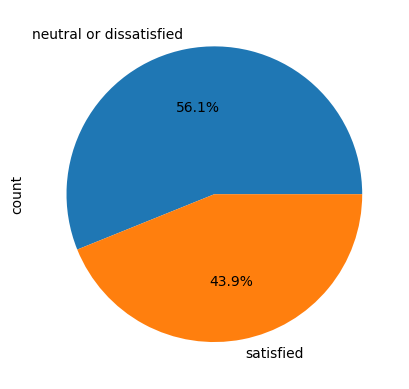

In [44]:
df['satisfaction'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [45]:
columns_to_check = [
    "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking",
    "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment",
    "On-board service", "Leg room service", "Baggage handling", "Checkin service",
    "Inflight service", "Cleanliness"
]

df["Total_Service_Score"] = df[columns_to_check].sum(axis=1)

df.loc[(df["satisfaction"] == "neutral or dissatisfied") & (df["Total_Service_Score"] > 18), "satisfaction"] = "neutral"
df.loc[(df["satisfaction"] == "neutral or dissatisfied") & (df["Total_Service_Score"] <= 18), "satisfaction"] = "dissatisfied"

df.drop(columns=["Total_Service_Score"], inplace=True)

<Axes: ylabel='count'>

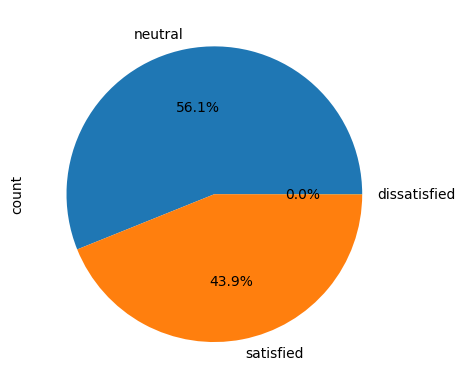

In [46]:
df['satisfaction'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [48]:
df["Total_Service_Score"] = df[columns_to_check].sum(axis=1)
df.loc[(df["satisfaction"] == "neutral") & (df["Total_Service_Score"] < 35), "satisfaction"] = "dissatisfied"
df.drop(columns=["Total_Service_Score"], inplace=True)

<Axes: ylabel='count'>

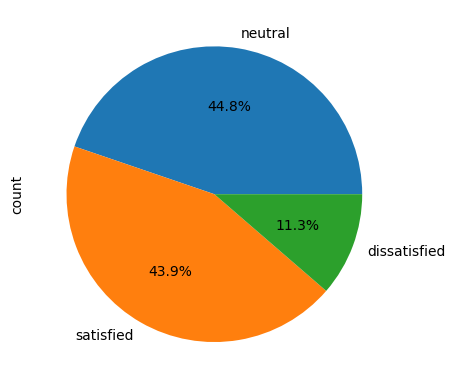

In [49]:
df['satisfaction'].value_counts().plot(kind='pie', autopct='%1.1f%%')

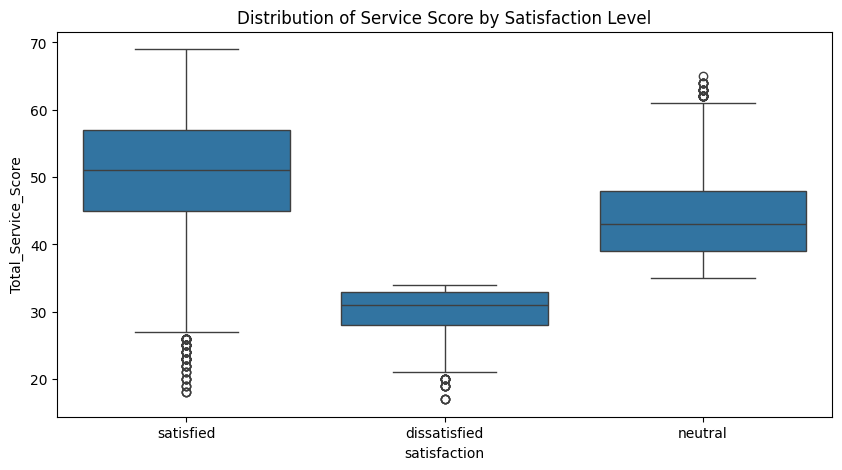

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="satisfaction", y="Total_Service_Score")
plt.title("Distribution of Service Score by Satisfaction Level")
plt.show()

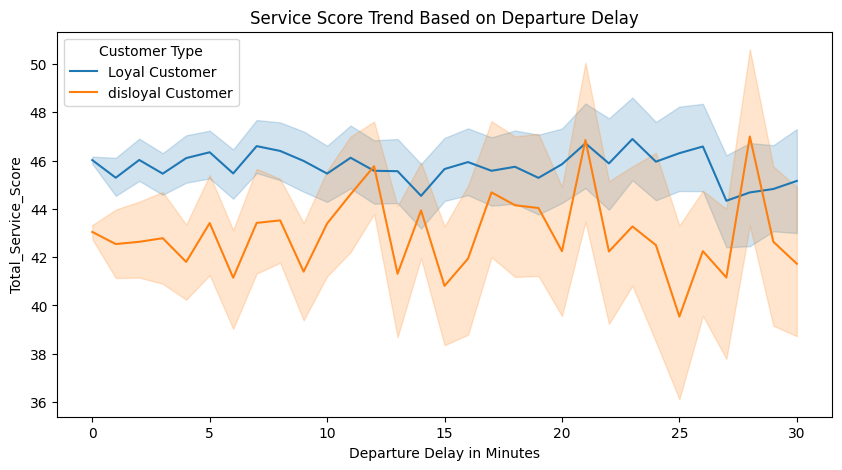

In [72]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Departure Delay in Minutes", y="Total_Service_Score", hue="Customer Type")
plt.title("Service Score Trend Based on Departure Delay")
plt.show()

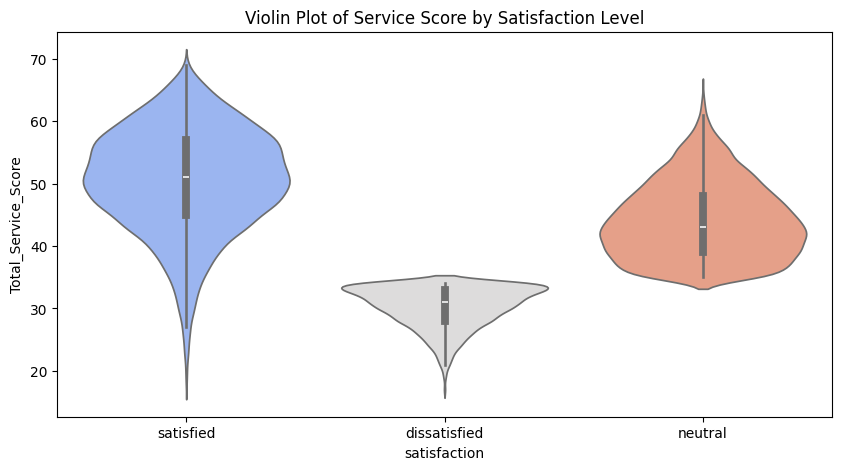

In [73]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="satisfaction", y="Total_Service_Score", palette="coolwarm")
plt.title("Violin Plot of Service Score by Satisfaction Level")
plt.show()

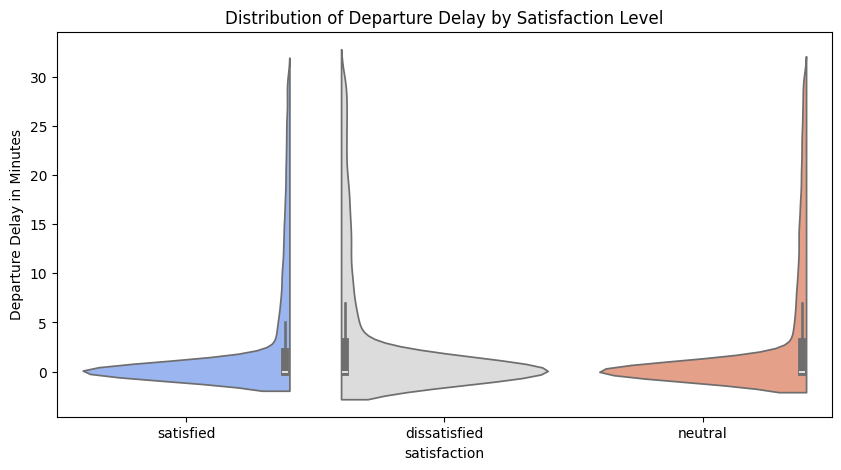

In [76]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="satisfaction", y="Departure Delay in Minutes", palette="coolwarm",split=True)
plt.title("Distribution of Departure Delay by Satisfaction Level")
plt.show()

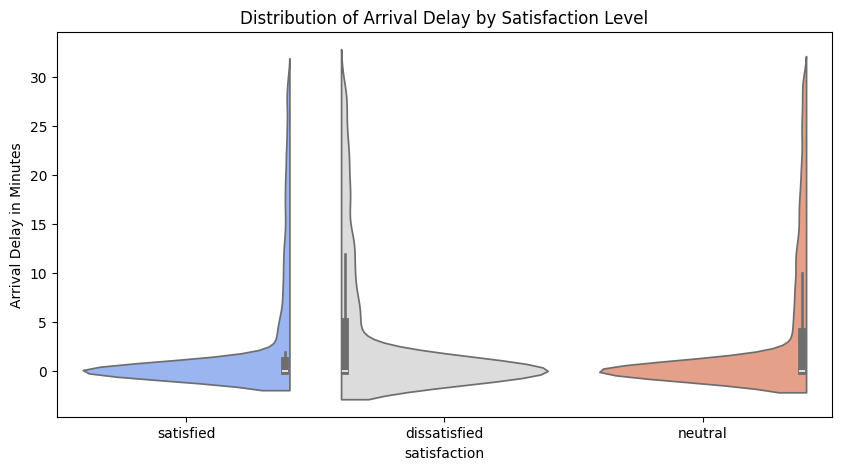

In [77]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="satisfaction", y="Arrival Delay in Minutes", palette="coolwarm",split=True)
plt.title("Distribution of Arrival Delay by Satisfaction Level")
plt.show()

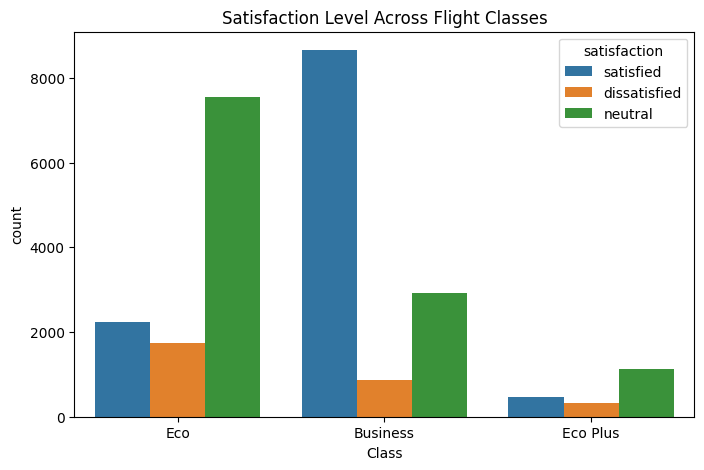

In [74]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Class", hue="satisfaction")
plt.title("Satisfaction Level Across Flight Classes")
plt.show()

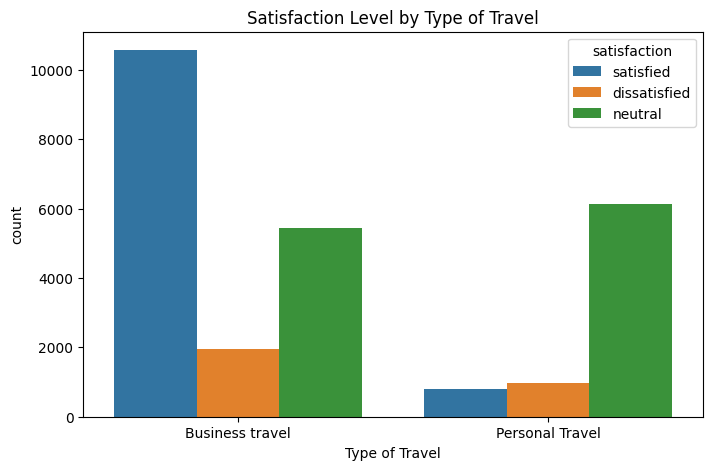

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Type of Travel", hue="satisfaction")
plt.title("Satisfaction Level by Type of Travel")
plt.show()

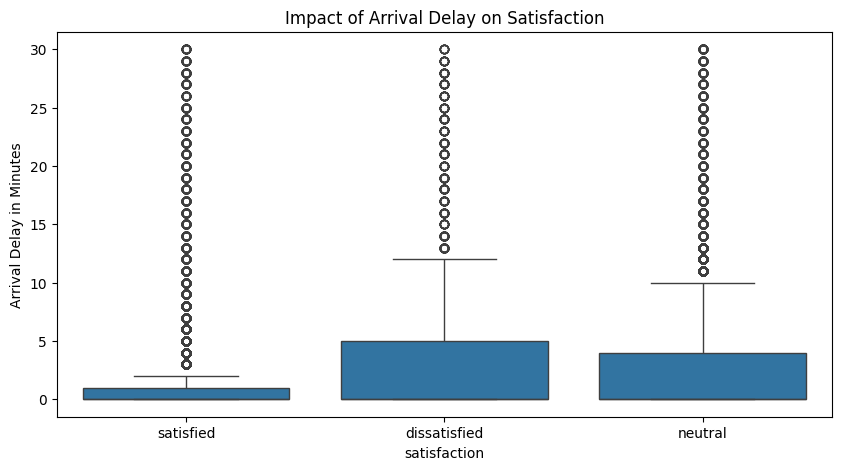

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="satisfaction", y="Arrival Delay in Minutes")
plt.title("Impact of Arrival Delay on Satisfaction")
plt.show()

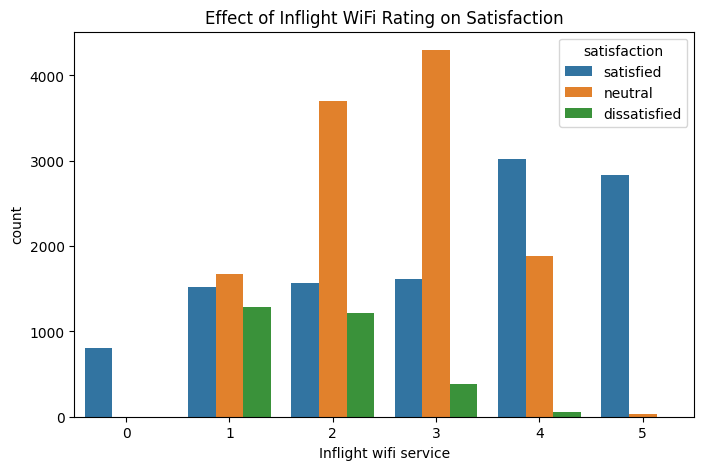

In [81]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Inflight wifi service", hue="satisfaction")
plt.title("Effect of Inflight WiFi Rating on Satisfaction")
plt.show()

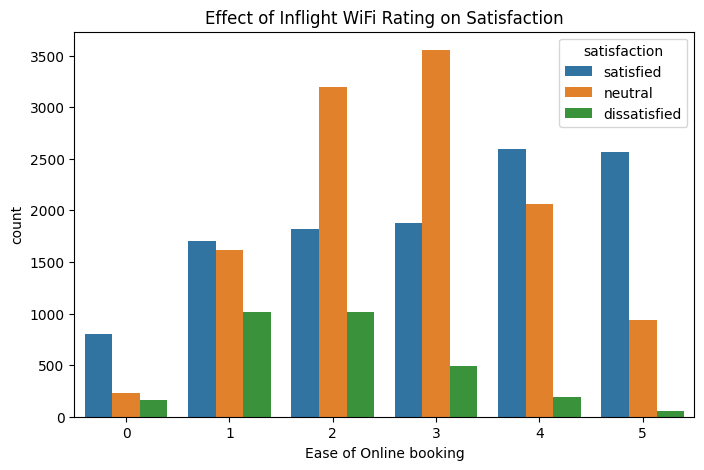

In [83]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Ease of Online booking", hue="satisfaction")
plt.title("Effect of Inflight WiFi Rating on Satisfaction")
plt.show()

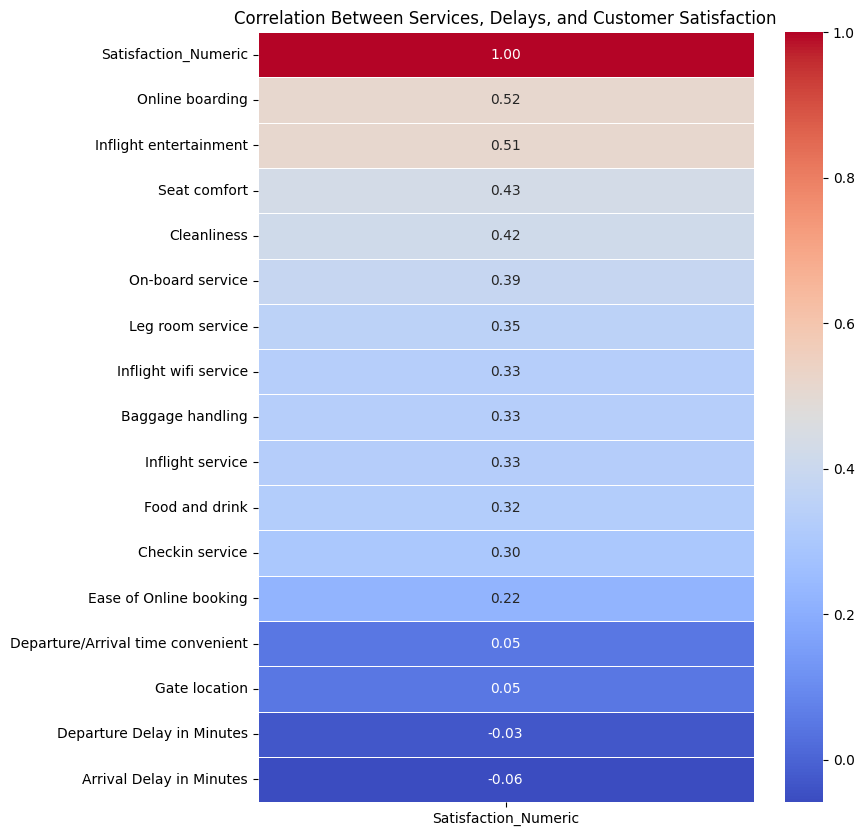

In [87]:
df["Satisfaction_Numeric"] = df["satisfaction"].map({"satisfied": 1, "neutral": 0, "dissatisfied": -1})

columns_for_correlation = [
    "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking",
    "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment",
    "On-board service", "Leg room service", "Baggage handling", "Checkin service",
    "Inflight service", "Cleanliness", "Departure Delay in Minutes", "Arrival Delay in Minutes"
]

correlation_matrix = df[columns_for_correlation + ["Satisfaction_Numeric"]].corr()
satisfaction_correlation = correlation_matrix[["Satisfaction_Numeric"]].sort_values(by="Satisfaction_Numeric", ascending=False)
plt.figure(figsize=(8,10))
sns.heatmap(satisfaction_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Services, Delays, and Customer Satisfaction")
plt.show()

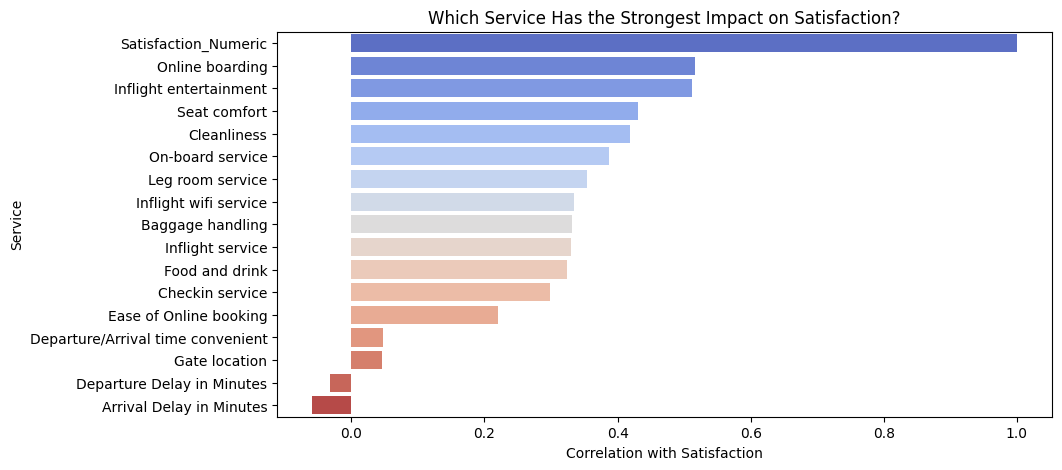

In [90]:
plt.figure(figsize=(10,5))
sns.barplot(data=satisfaction_correlation.reset_index(), x="Satisfaction_Numeric", y="index", palette="coolwarm")
plt.title("Which Service Has the Strongest Impact on Satisfaction?")
plt.xlabel("Correlation with Satisfaction")
plt.ylabel("Service")
plt.show()

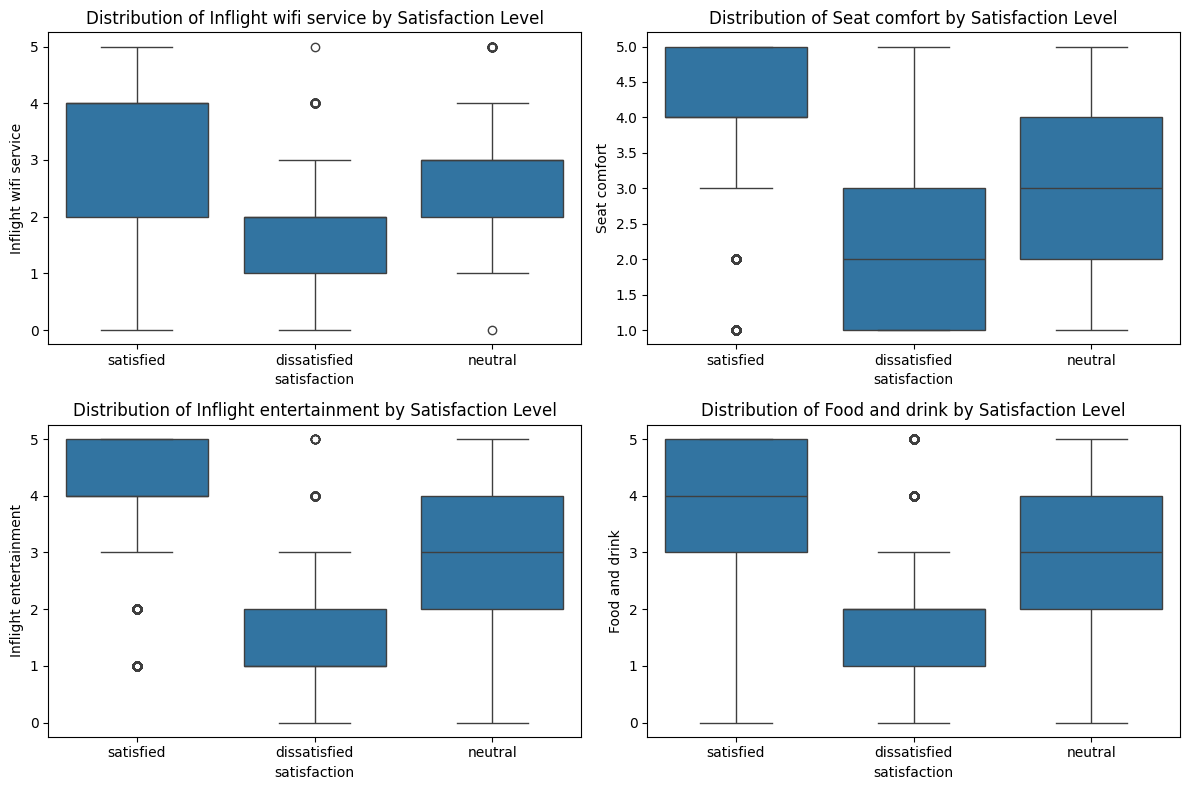

In [91]:
services = ["Inflight wifi service", "Seat comfort", "Inflight entertainment", "Food and drink"]

plt.figure(figsize=(12,8))
for i, service in enumerate(services, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="satisfaction", y=service)
    plt.title(f"Distribution of {service} by Satisfaction Level")
plt.tight_layout()
plt.show()